In [40]:
from keras import applications
import matplotlib.pyplot as plt
import os
import cv2
from keras.models import Model
from PIL import Image
import numpy as np
from scipy.misc import imresize
from sklearn.neighbors import NearestNeighbors

%matplotlib inline

In [3]:
pretrained_VGG = applications.VGG16(weights = 'imagenet', include_top = True)

In [4]:
pretrained_VGG.layers[-5].get_config()

{'data_format': 'channels_last',
 'name': 'block5_pool',
 'padding': 'valid',
 'pool_size': (2, 2),
 'strides': (2, 2),
 'trainable': True}

In [5]:
layer_name = 'fc2'
intermediate_layer_model = Model(inputs = pretrained_VGG.input, outputs = pretrained_VGG.get_layer(layer_name).output)

In [26]:
im_path = 'tryCMRu.png'
image = cv2.imread(im_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [27]:
image_pil = Image.open(im_path)
image_pil = np.array(image_pil)
imreszie_pil = imresize(image_pil, (224, 224))

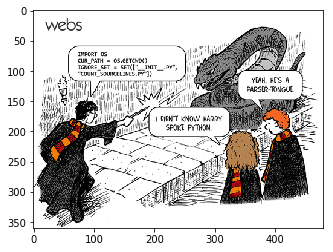

In [28]:
plt.imshow(image)

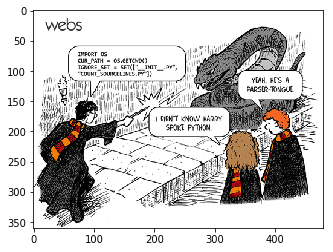

In [29]:
plt.imshow(image_pil)

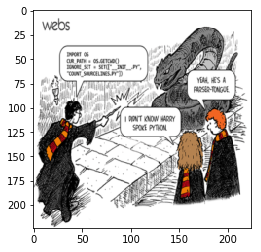

In [30]:
plt.imshow(imreszie_pil)

In [31]:
resized_image = cv2.resize(image, (224, 224))
resized_image_with_dummy_dimensions = resized_image[None,:,:]

In [32]:
feature_vec = intermediate_layer_model.predict(resized_image_with_dummy_dimensions)

In [33]:
feature_vec.shape

(1, 4096)

In [34]:
im_list = os.listdir('Photos')

In [37]:
feature_vec_list = []
for full_im_path in im_list:
    im = cv2.imread(os.path.join('Photos', full_im_path))
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    im = cv2.resize(im, (224, 224))
    im = im[None]
    feature_vec = intermediate_layer_model.predict(im)
    
    feature_vec_list.append(feature_vec.ravel())

In [42]:
np.array(feature_vec_list)

array([[ 0.        ,  0.        ,  1.80500746, ...,  0.22805014,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.94019222, ...,  0.78592205,
         2.82034302,  0.        ],
       [ 1.73706901,  1.02357733,  1.77412236, ...,  0.        ,
         0.        ,  2.49885058],
       ..., 
       [ 0.        ,  2.68562818,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.10341001, ...,  0.        ,
         4.30440998,  0.        ],
       [ 0.        ,  0.        ,  2.6493578 , ...,  0.        ,
         0.        ,  2.99889779]], dtype=float32)

In [41]:
neighbors = NearestNeighbors(n_neighbors = 11)

In [47]:
neighbors.fit(feature_vec_list)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=11, p=2, radius=1.0)

In [49]:
query_vec = feature_vec_list[0]
distances, indicies = neighbors.kneighbors(query_vec[None])

In [50]:
indicies

array([[ 0,  1, 10, 19, 29, 14, 22, 18,  5, 20, 31]])

In [51]:
distances

array([[  0.        ,  70.96780758,  72.39672843,  72.39843783,
         72.89710759,  73.06670674,  74.31184554,  77.77681571,
         79.08232042,  80.79371432,  81.70025754]])

In [53]:
print im_list[0]
print im_list[1]
print im_list[10]

462742_397040473640205_111165645_o.jpg
4kxU76p.png
Screen Shot 2015-06-27 at 12.37.22 AM.png
